<a href="https://colab.research.google.com/github/Kiwiabacaxi/PDI/blob/main/Exercicio_de_Pratica_de_Convolucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática de Convolução de Imagem

Pegar a Imagem original e aplicar o que se pede:


Material complementar:
https://professor.luzerna.ifc.edu.br/ricardo-antonello/wp-content/uploads/sites/8/2017/02/Livro-Introdu%C3%A7%C3%A3o-a-Vis%C3%A3o-Computacional-com-Python-e-OpenCV.pdf

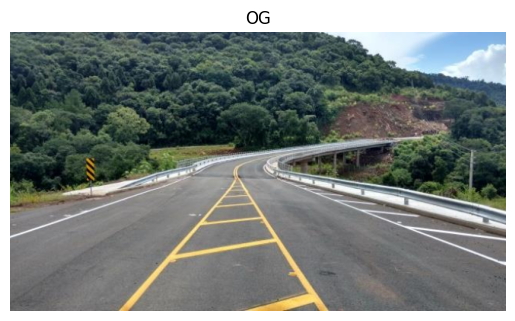

In [2]:
import cv2
import matplotlib.pyplot as plt

img_original = cv2.imread('/content/img_original.png')

plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)) # Convert direto
plt.title('OG')
plt.axis('off')
plt.show()

implementação do filtro Negativo em RGB: os valores das bandas R, G e B são invertidos conforme a operação aritmética: 255 menos o valor do pixel da matriz;

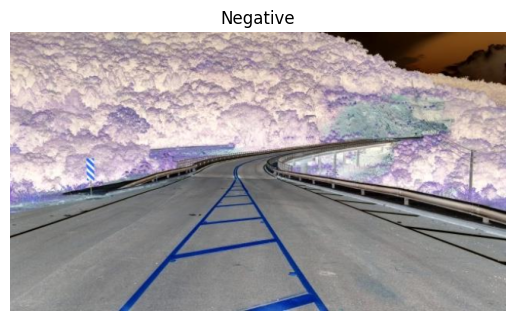

In [5]:
img_negative = 255 - img_original

plt.imshow(cv2.cvtColor(img_negative, cv2.COLOR_BGR2RGB))
plt.title('Negative')
plt.axis('off')
plt.show()

implementação do controle de Brilho Aditivo: é somado uma medida definida pelo usuário a todos os pixels das bandas R, G e B;

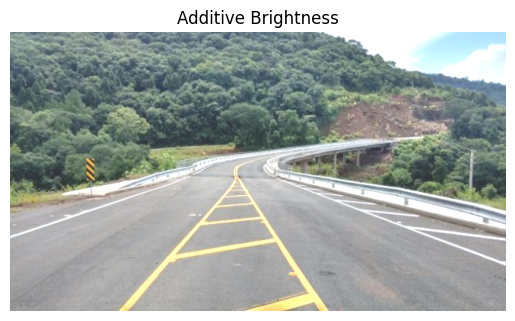

In [7]:
brightness_value = 50  # Define the value

# Add brightness
img_brightness_additive = cv2.add(img_original, brightness_value)

plt.imshow(cv2.cvtColor(img_brightness_additive, cv2.COLOR_BGR2RGB))
plt.title('Additive Brightness')
plt.axis('off')
plt.show()

implementação do controle de Brilho Multiplicativo: é multiplicado uma medida definida pelo usuário a todos os pixels das bandas R, G e B;

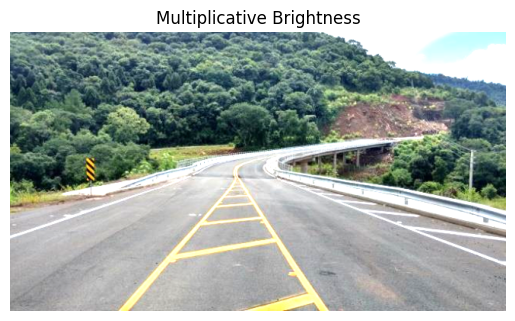

In [9]:
# Multiplicative Brightness
brightness_factor = 1.5  # Define the value

# Multiply
img_brightness_multiplicative = cv2.multiply(img_original, brightness_factor)

plt.imshow(cv2.cvtColor(img_brightness_multiplicative, cv2.COLOR_BGR2RGB))
plt.title('Multiplicative Brightness')
plt.axis('off')
plt.show()

Filtro da média com máscara 3x3

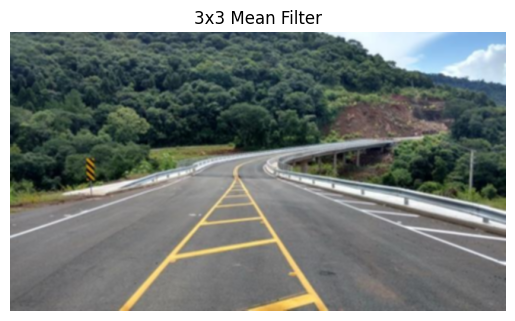

In [12]:
# 3x3 Mean Filter
# Apply a 3x3 kernel
img_mean_3x3 = cv2.blur(img_original, (3, 3))

plt.imshow(cv2.cvtColor(img_mean_3x3, cv2.COLOR_BGR2RGB))
plt.title('3x3 Mean Filter')
plt.axis('off')
plt.show()

Filtro da média com máscara 9x9

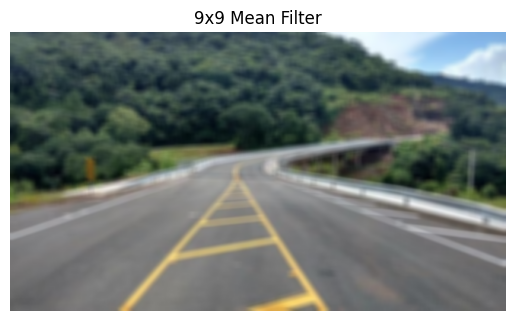

In [13]:
# 9x9 Mean Filter
# Apply a 9x9 kernel for mean filtering
img_mean_9x9 = cv2.blur(img_original, (9, 9))

# Display the image after applying the 9x9 mean filter
plt.imshow(cv2.cvtColor(img_mean_9x9, cv2.COLOR_BGR2RGB))
plt.title('9x9 Mean Filter')
plt.axis('off')
plt.show()

Outro Filtro Passa Baixa

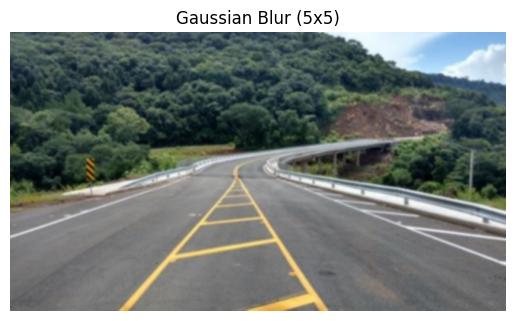

In [15]:
# Passa baixa: Gaussian Blur
img_gaussian_blur = cv2.GaussianBlur(img_original, (5, 5), 0)

plt.imshow(cv2.cvtColor(img_gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur (5x5)')
plt.axis('off')
plt.show()

Fazer, usando convolução, o Filtro Passa-Alta (Prewitt)

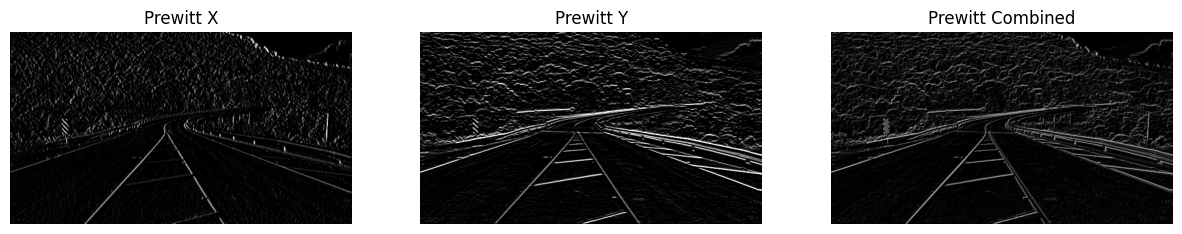

In [18]:
# Prewit
import numpy as np # Import numpy

img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

# Definir os kernels de Prewitt para detecção de bordas nas direções x e y
kernel_prewitt_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]], dtype=np.float32)

kernel_prewitt_y = np.array([[-1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]], dtype=np.float32)

img_prewitt_x = cv2.filter2D(img_gray, -1, kernel_prewitt_x)
img_prewitt_y = cv2.filter2D(img_gray, -1, kernel_prewitt_y)

# Plot all together
img_prewitt_combined = cv2.addWeighted(img_prewitt_x, 0.5, img_prewitt_y, 0.5, 0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_prewitt_x, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_prewitt_y, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_prewitt_combined, cmap='gray')
plt.title('Prewitt Combined')
plt.axis('off')

plt.show()

Fazer, usando convolução, o Filtro Passa-Alta (Sobel)

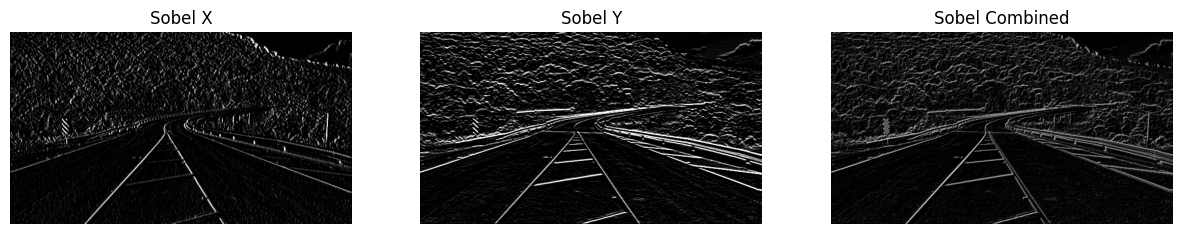

In [21]:
# Sobel

img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

# Definir os kernels de Sobel para detecção de bordas nas direções x e y
kernel_sobel_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=np.float32)

kernel_sobel_y = np.array([[-1, -2, -1],
                            [ 0,  0,  0],
                            [ 1,  2,  1]], dtype=np.float32)

img_sobel_x = cv2.filter2D(img_gray, -1, kernel_sobel_x)
img_sobel_y = cv2.filter2D(img_gray, -1, kernel_sobel_y)


# Combinar os resultados para obter a magnitude das bordas
img_sobel_combined = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.show()

Fazer, usando convolução, o Filtro Passa-Alta (Laplace)


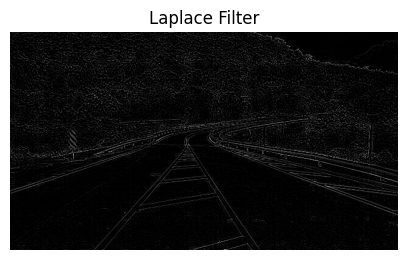

In [23]:
# High-Pass Filter (Laplace) using convolution

# Convert the image to grayscale
img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

# Define the Laplace kernel
kernel_laplace = np.array([[ 0,  1,  0],
                            [ 1, -4,  1],
                            [ 0,  1,  0]], dtype=np.float32)

# Apply the Laplace kernel using convolution
img_laplace = cv2.filter2D(img_gray, -1, kernel_laplace)

# Display the result in a figure with one subplot to match the requested format
plt.figure(figsize=(5, 5)) # Adjust figure size as needed

plt.subplot(1, 1, 1) # Displaying a single image in a 1x1 grid
plt.imshow(img_laplace, cmap='gray')
plt.title('Laplace Filter')
plt.axis('off')

plt.show()

Propor um outro filtro Passa-Alta

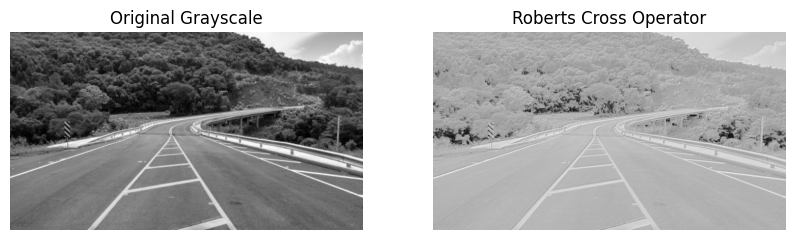

In [37]:
# Custom High-Pass Filter: Roberts Cross Operator custom

img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

kernel_roberts_x = np.array([[ 1,  0],
                             [ 0, -1/2]], dtype=np.float32)

kernel_roberts_y = np.array([[ 0,  12],
                             [-1,  0]], dtype=np.float32)

img_roberts_x = cv2.filter2D(img_gray, -1, kernel_roberts_x)
img_roberts_y = cv2.filter2D(img_gray, -1, kernel_roberts_y)

img_roberts_combined = cv2.addWeighted(img_roberts_x, 0.5, img_roberts_y, 0.5, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_roberts_combined, cmap='gray')
plt.title('Roberts Cross Operator')
plt.axis('off')

plt.show()

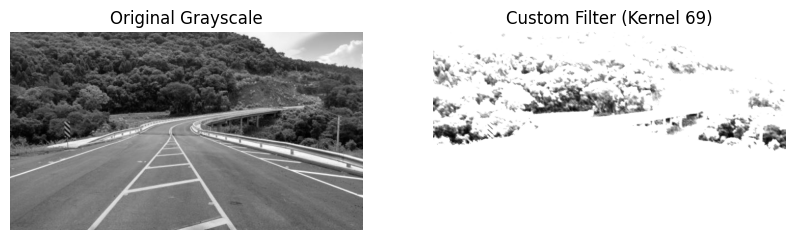

In [32]:
# Custom High-Pass Filter: Kernel 69

kernel_69 = np.array([[69/42,   0,              0],
                      [ 0,      0,          69/42],
                      [ 0,  69/42,             0]], dtype=np.float32)

img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

img_custom_filter = cv2.filter2D(img_gray, -1, kernel_69)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_custom_filter, cmap='gray')
plt.title('Custom Filter (Kernel 69)')
plt.axis('off')

plt.show()